## Import Packages 

In [1]:
!pip install imblearn

In [326]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [327]:
teledata = pd.read_csv('telecom_churn_data.csv')

In [328]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [329]:
teledata.shape

(99999, 226)

In [330]:
teledata.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [331]:
teledata.isna().mean().round(4) * 100

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

###### Deriving new features 

To calculate the average recharge amount we need to have the recharge amount for both call and mobile data / sms recharge.

But we are already been provided with the  recharge amount for call so need to calculate the average amount for the data/sms 

In [332]:
teledata['total_rech_amt_data_6'] = teledata['total_rech_data_6'] * teledata['av_rech_amt_data_6']

In [333]:
teledata['total_rech_amt_data_7'] = teledata['total_rech_data_7'] * teledata['av_rech_amt_data_7']
teledata['total_rech_amt_data_8'] = teledata['total_rech_data_8'] * teledata['av_rech_amt_data_8']
teledata['total_rech_amt_data_9'] = teledata['total_rech_data_9'] * teledata['av_rech_amt_data_9']

In [334]:
teledata.shape


(99999, 230)

Now we can drop the columns total_rech_data and av_rech_amnt_data as we have derived new column from this columns

In [335]:
teledata.drop(['total_rech_data_6' , 'total_rech_data_7' , 'total_rech_data_8' , 'total_rech_data_9' , 'av_rech_amt_data_6' , 'av_rech_amt_data_7' , 'av_rech_amt_data_8' , 'av_rech_amt_data_9'] , axis=1 , inplace=True)

###### Filter High value customers 

In [336]:
# Average recharge amount for 6 and 7 month that is good phase
avg_rch_amount_67 = (teledata['total_rech_amt_data_6'].fillna(0) + teledata['total_rech_amt_data_7'].fillna(0) + teledata['total_rech_amt_6'].fillna(0) + teledata['total_rech_amt_7'].fillna(0)) / 2

In [337]:
#Getting the 70th percentile
seventy_percentile = np.percentile(avg_rch_amount_67 , 70)

In [338]:
#Filtereing the data on the 70th percentile
teledata = teledata[avg_rch_amount_67 >= seventy_percentile]

In [339]:
teledata.shape

(30001, 222)

###### Tag customers churn and non-churn

In [340]:
# tagging churner
teledata['churn'] = np.where(teledata[['total_ic_mou_9' , 'total_og_mou_9' , 'vol_2g_mb_9' , 'vol_3g_mb_9']].sum(axis=1) == 0 , 1 , 0)

In [341]:
teledata.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014

In [342]:
#Remove all the columns haivng _9 in the column name
teledata = teledata[teledata.columns.drop(list(teledata.filter(regex='_9')))]

#### Since date of last rech in each month only provides when user recharged their SIM, we can delete last_date of rech column for all 3 months

In [343]:
teledata.drop(["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"],axis=1,inplace=True)

In [344]:
teledata.shape

(30001, 167)

## Exploratory Data Analysis 

Steps to be preformed:
1. Missing value treatment
2. Removing the non-unique values
3. Outlier treatment
4. Remove highly correlated values
5. Convert the columns to appropraite format

###### MIssing value treatment 

In [345]:
teledata.isna().mean().round(4) * 100

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

In [346]:
nan_loans = round(teledata.isnull().sum()/len(teledata) , 4)

In [347]:
nan_columns_list = list(nan_loans[nan_loans > 0.3000].index)
len(nan_columns_list)

27

There are 27 columns with more than 30% missing values so we will dropping them as they are not needed for further analysis

In [348]:
teledata.drop(nan_columns_list, axis = 1 , inplace=True)

In [349]:
teledata.isna().mean().round(4) * 100

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          0.75
std_og_t2o_mou          0.75
loc_ic_t2o_mou          0.75
last_date_of_month_6    0.00
last_date_of_month_7    0.09
last_date_of_month_8    0.55
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             1.82
onnet_mou_7             1.79
onnet_mou_8             3.91
offnet_mou_6            1.82
offnet_mou_7            1.79
offnet_mou_8            3.91
roam_ic_mou_6           1.82
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_og_mou_6           1.82
roam_og_mou_7           1.79
roam_og_mou_8           3.91
loc_og_t2t_mou_6        1.82
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2m_mou_6        1.82
loc_og_t2m_mou_7        1.79
loc_og_t2m_mou_8        3.91
loc_og_t2f_mou_6        1.82
loc_og_t2f_mou_7        1.79
loc_og_t2f_mou_8        3.91
loc_og_t2c_mou_6        1.82
loc_og_t2c_mou_7        1.79
loc_og_t2c_mou

There are still few columns which has missing values around 1% to 4% but before that we can check for the uniqueness in columns and will treat the further missing values

In [350]:
non_unqiue_columns = ['loc_og_t2o_mou' , 'std_og_t2o_mou' , 'loc_ic_t2o_mou' , 'last_date_of_month_7' , 'last_date_of_month_8' , 'last_date_of_month_6' , 'std_og_t2c_mou_8' , 'std_og_t2c_mou_7' , 'std_og_t2c_mou_6' , 'circle_id' , 'std_ic_t2o_mou_6' , 'std_ic_t2o_mou_7' , 'std_ic_t2o_mou_8']

In [351]:
teledata.drop(non_unqiue_columns , axis=1 , inplace=True)

In [352]:
teledata.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,265.618262,272.700470,243.646938,380.608111,384.994337,348.723294,16.408431,12.872921,13.009645,27.063178,20.519370,20.674656,86.047905,87.235755,81.256858,166.263652,165.980922,157.937216,6.461494,6.540759,6.126112,1.604247,1.924320,1.777295,258.781428,259.765948,245.328371,168.954534,177.409496,154.486547,182.753296,191.345743,163.758261,1.836917,1.859332,1.649273,353.548540,370.618355,319.897555,2.211703,2.144122,2.028343,5.925921,7.238206,6.824251,0.673323,0.043687,0.05995

As we can almost see all columns have outliers so we can either fill the missing values with the median or drop the rows with the missing values

Since all the missing values in column is under 8% and we have large amount of data set. Hence we can delete all the missing value ROWS

In [353]:
teledata=teledata.dropna()

In [354]:
teledata.shape

(28504, 127)

In [355]:
teledata.isna().mean().round(4) * 100

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

Lets check the correlation among the variables and drop the variables with the high correlation and take the threshold as 60

In [356]:
cor = teledata.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

total_ic_mou_7      loc_ic_t2m_mou_6    0.601762
roam_og_mou_8       roam_og_mou_7       0.603904
offnet_mou_8        offnet_mou_6        0.604976
total_ic_mou_8      loc_ic_t2t_mou_8    0.605104
std_ic_mou_7        std_ic_t2m_mou_8    0.606981
total_og_mou_6      std_og_t2t_mou_6    0.607345
max_rech_amt_8      max_rech_amt_6      0.607905
std_og_mou_7        std_og_t2t_mou_8    0.608347
total_ic_mou_6      loc_ic_t2t_mou_6    0.608907
std_ic_mou_6        std_ic_t2m_mou_7    0.609606
loc_og_mou_6        loc_og_t2t_mou_7    0.609768
roam_ic_mou_8       roam_ic_mou_7       0.612381
total_og_mou_7      std_og_t2t_mou_7    0.612532
sachet_2g_8         sachet_2g_6         0.613735
monthly_3g_6        vol_3g_mb_6         0.614996
std_og_mou_7        offnet_mou_7        0.616469
std_ic_t2m_mou_8    std_ic_t2m_mou_6    0.616917
std_og_t2m_mou_7    offnet_mou_6        0.617236
std_og_mou_8        std_og_mou_6        0.618045
last_day_rch_amt_7  max_rech_amt_7      0.618138
std_og_mou_7        

In [357]:
col_drop = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8']

In [358]:
teledata.drop(col_drop , axis=1 , inplace=True)

In [359]:
teledata.shape

(28504, 88)

We have a class imbalance here so we will be dealing with this afterwards

In [360]:
print(teledata.churn.value_counts()*100/teledata.shape[0])

0    94.400786
1     5.599214
Name: churn, dtype: float64


We will derive the average values for both the months 6 and 7

In [363]:
teledata['Avg_arpu_6_7'] = (teledata.arpu_6 + teledata.arpu_7)/2

teledata['Avg_onnet_6_7'] = (teledata.onnet_mou_6 + teledata.onnet_mou_7)/2

teledata['Avg_offnet_mou_6_7'] = (teledata.offnet_mou_6 + teledata.offnet_mou_7)/2


teledata['Avg_roam_ic_mou_6_7'] = (teledata.roam_ic_mou_6 + teledata.roam_ic_mou_7)/2

teledata['Avg_roam_og_mou_6_7'] = (teledata.roam_og_mou_6 + teledata.roam_og_mou_7)/2

teledata['Avg_loc_og_mou_6_7'] = (teledata.loc_og_mou_6 + teledata.loc_og_mou_7)/2

teledata['Avg_std_og_mou_6_7'] = (teledata.std_og_mou_6 + teledata.std_og_mou_7)/2

teledata['Avg_isd_og_mou_6_7'] = (teledata.isd_og_mou_6 + teledata.isd_og_mou_7)/2

teledata['Avg_spl_og_mou_6_7'] = (teledata.spl_og_mou_6 + teledata.spl_og_mou_7)/2

teledata['Avg_loc_ic_mou_6_7'] = (teledata.loc_ic_mou_6 + teledata.loc_ic_mou_7)/2

teledata['Avg_std_ic_mou_6_7'] = (teledata.std_ic_mou_6 + teledata.std_ic_mou_7)/2

teledata['Avg_isd_ic_mou_6_7'] = (teledata.isd_ic_mou_6 + teledata.isd_ic_mou_7)/2

teledata['Avg_spl_ic_mou_6_7'] = (teledata.spl_ic_mou_6 + teledata.spl_ic_mou_7)/2

teledata['Avg_total_rech_num_6_7'] = (teledata.total_rech_num_6 + teledata.total_rech_num_7)/2

teledata['Avg_max_rech_amt_6_7'] = (teledata.max_rech_amt_6 + teledata.max_rech_amt_7)/2

teledata['Avg_vol_2g_mb_6_7'] = (teledata.vol_2g_mb_6 + teledata.vol_2g_mb_7)/2

In [365]:
### We need to further derive variable that shows the decline in usage from 6 & 7 month to 8th month (AVG of 6th & 7 th)
teledata['arpu_diff'] = teledata.arpu_8 - teledata['Avg_arpu_6_7']

teledata['onnet_mou_diff'] = teledata.onnet_mou_8 - teledata['Avg_onnet_6_7']

teledata['offnet_mou_diff'] = teledata.offnet_mou_8 - teledata['Avg_offnet_mou_6_7']

teledata['roam_ic_mou_diff'] = teledata.roam_ic_mou_8 - teledata['Avg_roam_ic_mou_6_7']

teledata['roam_og_mou_diff'] = teledata.roam_og_mou_8 - teledata['Avg_roam_og_mou_6_7']

teledata['loc_og_mou_diff'] = teledata.loc_og_mou_8 - teledata['Avg_loc_og_mou_6_7']

teledata['std_og_mou_diff'] = teledata.std_og_mou_8 - teledata['Avg_std_og_mou_6_7']

teledata['isd_og_mou_diff'] = teledata.isd_og_mou_8 - teledata['Avg_isd_og_mou_6_7']

teledata['spl_og_mou_diff'] = teledata.spl_og_mou_8 - teledata['Avg_spl_og_mou_6_7']

teledata['loc_ic_mou_diff'] = teledata.loc_ic_mou_8 - teledata['Avg_loc_ic_mou_6_7']

teledata['std_ic_mou_diff'] = teledata.std_ic_mou_8 - teledata['Avg_std_ic_mou_6_7']

teledata['isd_ic_mou_diff'] = teledata.isd_ic_mou_8 - teledata['Avg_isd_ic_mou_6_7']

teledata['spl_ic_mou_diff'] = teledata.spl_ic_mou_8 - teledata['Avg_spl_ic_mou_6_7']

teledata['total_rech_num_diff'] = teledata.total_rech_num_8 - teledata['Avg_total_rech_num_6_7']

teledata['max_rech_amt_diff'] = teledata.max_rech_amt_8 - teledata['Avg_max_rech_amt_6_7']

teledata['vol_2g_mb_diff'] = teledata.vol_2g_mb_8 - teledata['Avg_vol_2g_mb_6_7']

In [366]:
teledata['vol_2g_mb_diff'].describe()

count    28504.000000
mean       -18.266349
std        256.823889
min      -4740.925000
25%        -19.793750
50%          0.000000
75%          0.000000
max       8062.295000
Name: vol_2g_mb_diff, dtype: float64

# Visualization  of Data

In [367]:
teledata.describe(include="all")

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Avg_arpu_6_7,Avg_onnet_6_7,Avg_offnet_mou_6_7,Avg_roam_ic_mou_6_7,Avg_roam_og_mou_6_7,Avg_loc_og_mou_6_7,Avg_std_og_mou_6_7,Avg_isd_og_mou_6_7,Avg_spl_og_mou_6_7,Avg_loc_ic_mou_6_7,Avg_std_ic_mou_6_7,Avg_isd_ic_mou_6_7,Avg_spl_ic_mou_6_7,Avg_total_rech_num_6_7,Avg_vol_2g_mb_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,Avg_max_rech_amt_6_7,max_rech_amt_diff,vol_2g_mb_diff
count,2.850400e+04,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.00000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,7.001214e+09,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,16.267511,12.921422,13.032309,26.829239,20.525915,20.751873,1.604110,1.924375,1.776181,261.427575,264.906656,247.319197,1.841955,1.883985,1.656881,350.223287,373.574691,320.454416,2.007030,2.064508,1.970780,5.883774,7.278917,6.835485,0.670457,0.044911,0.060633,237.225872,243.191607,234.326705,15.071190,15.892790,14.525961,2.763331,2.904175,2.684498,47.594301,50.678183,46.440159,0.062622,0.020269,0.027632,10.757296,12.055595,11.347455,1.173068,1.551766,1.278381,11.965514,11.962602,10.327463,167.778347,171.248527,163.318832,99.490422,100.726214,94.216321,127.070776,127.005523,108.7

In [368]:
# funtions to be used in data visualization and summary
def insight_univar(variable):
    print(variable.describe())
    sns.distplot(variable)
        
            
# bivariate analysis for numeric variable    
def insight_bivar_num(var1, var2):
    sns.regplot(var1, var2)

# bivariate analysis for categorical variable    
def insight_bivar_cat(var1, var2):
    sns.boxplot(var1, var2)

count    28504.000000
mean       560.375015
std        448.960314
min      -2258.709000
25%        317.360500
50%        485.169000
75%        698.914000
max      27731.088000
Name: arpu_6, dtype: float64


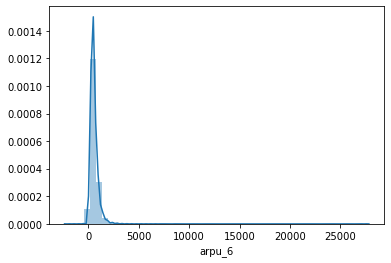

In [369]:
insight_univar(teledata.arpu_6)

count    28504.000000
mean       244.727998
std        464.022072
min          0.000000
25%         14.840000
50%         74.085000
75%        257.415000
max      10752.560000
Name: onnet_mou_8, dtype: float64


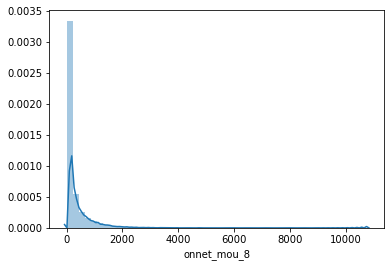

In [370]:
insight_univar(teledata.onnet_mou_8)

count    28504.000000
mean       350.226224
std        485.648594
min          0.000000
25%         60.490000
50%        199.875000
75%        457.432500
max      14007.340000
Name: offnet_mou_8, dtype: float64


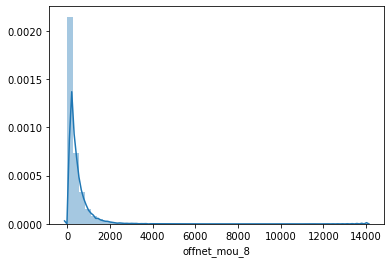

In [371]:
insight_univar(teledata.offnet_mou_8)

In [483]:
month = teledata['aon']/30
month

7        26.733333
8        10.500000
21       24.000000
23       20.133333
33       44.266667
           ...    
99981    15.766667
99984    27.333333
99986    89.866667
99988    10.933333
99997    15.933333
Name: aon, Length: 28504, dtype: float64

In [485]:
def compute_years(x):
    if x<=12:
        return "<1"
    elif x<=24 and x>12:
        return "1-2"
    elif x<=60 and x>24:
        return "2-5"
    else:
        return "5+"
    
years_with_company = month.apply(lambda x: compute_years(x))

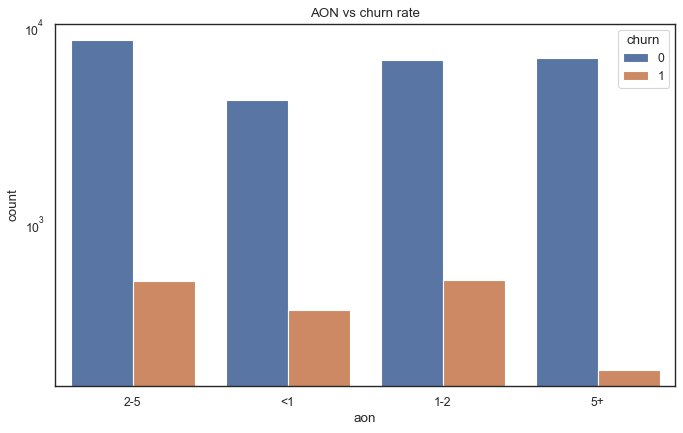

In [487]:
sns.set(style="white")
plt.figure(figsize=(10,6),edgecolor="k",facecolor="w",dpi=80)
sns.countplot(years_with_company,hue=teledata["churn"])
plt.yscale("log")
plt.title("AON vs churn rate")
plt.show()

The curn rate for customers with less than 5 years

# Bivariate EDA

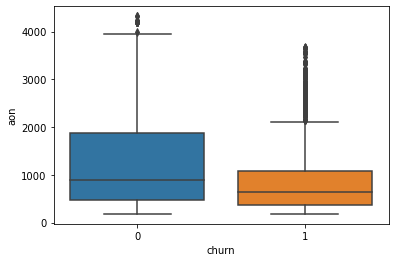

In [372]:
insight_bivar_cat(teledata.churn, teledata.aon)

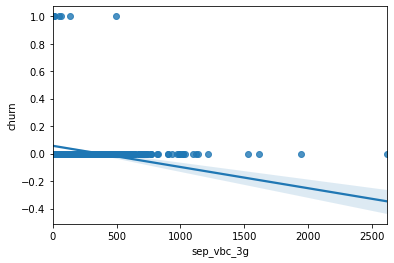

In [373]:
insight_bivar_num(teledata.sep_vbc_3g, teledata.churn)

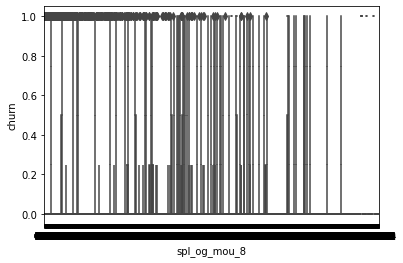

In [374]:
insight_bivar_cat(teledata.spl_og_mou_8, teledata.churn)

In [375]:
pd.crosstab(teledata.churn, teledata.arpu_diff, normalize='columns')*100

arpu_diff,-4598.7115,-3895.7845,-3164.4350,-2950.5065,-2933.5545,-2812.0890,-2807.8845,-2595.9850,-2313.8670,-2103.2745,-2101.8240,-2045.4245,-2042.8050,-1999.5270,-1985.5625,-1911.5490,-1911.1610,-1856.5585,-1789.1525,-1783.8190,-1777.0040,-1758.1990,-1723.8445,-1715.1550,-1711.6075,-1695.1120,-1689.0390,-1679.5150,-1667.0355,-1658.3700,-1645.0955,-1629.7400,-1615.4080,-1599.3810,-1588.1885,-1582.4110,-1524.2775,-1520.6600,-1513.1840,-1511.8845,-1511.3720,-1507.4620,-1492.4385,-1490.8960,-1479.1815,-1467.0040,-1464.8460,-1454.0985,-1453.9045,-1444.6445,-1431.2345,-1420.8845,-1418.8565,-1418.4555,-1415.9510,-1415.4285,-1398.5835,-1397.8115,-1397.6145,-1385.6455,-1367.5645,-1366.3160,-1364.2250,-1357.5495,-1355.3855,-1354.7810,-1351.0030,-1350.7070,-1343.2615,-1337.8345,-1337.0550,-1315.1575,-1312.3855,-1311.9265,-1303.6985,-1296.5050,-1294.9565,-1292.2125,-1286.8375,-1282.3205,-1282.2635,-1279.8380,-1265.0125,-1263.0515,-1262.1440,-1260.6965,-1254.9635,-1249.5340,-1243.7250,-1241.9810,-1241.5925,-1224.6735,-1222.0550,-1207.9895,-1207.7320,-1207.1820,-1201.4405,-1195.8360,-1193.8350,-1193.1405,-1193.0760,-1193.0035,-1191.2220,-1187.3200,-1187.0385,-1184.6880,-1179.2845,-1177.8540,-1165.4030,-1157.1675,-1156.7710,-1156.5650,-1154.6500,-1152.8465,-1151.8690,-1149.6570,-1142.5940,-1139.0620,-1136.3270,-1133.3235,-1131.3845,-1125.8885,-1125.2160,-1124.8040,-1122.8195,-1119.2735,-1113.0400,-1110.6530,-1110.1485,-1108.8030,-1105.8330,-1104.8885,-1102.5095,-1102.3925,-1101.1125,-1097.2475,-1092.1435,-1089.1300,-1082.6630,-1082.5650,-1080.4465,-1075.6520,-1073.4200,-1071.7950,-1068.5760,-1068.5220,-1065.0650,-1063.4140,-1059.9635,-1059.9480,-1059.5885,-1057.8770,-1055.8225,-1055.8140,-1054.4720,-1054.3195,-1052.8175,-1052.5810,-1051.6900,-1051.5770,-1049.9495,-1047.5870,-1045.7075,-1045.3810,-1044.8120,-1043.4400,-1041.9275,-1039.6260,-1038.6880,-1036.4145,-1028.1310,-1027.8470,-1026.2420,-1025.8770,-1024.5745,-1022.1010,-1019.7750,-1019.5020,-1019.3825,-1018.4520,-1017.3500,-1016.0280,-1015.7590,-1015.4860,-1007.9920,-1006.2295,-1005.3400,-1003.9470,-1002.1330,-1001.7480,-1001.7035,-998.5855,-998.0995,-995.6315,-995.2780,-994.1900,-992.4270,-990.7410,-989.3515,-988.2290,-987.6500,-986.1210,-982.5235,-979.9205,-979.0315,-977.6630,-976.5555,-975.0020,-969.6715,-967.7615,-967.6670,-966.6030,-966.0625,-965.6545,-963.4505,-962.5070,-958.9315,-957.3905,-957.1565,-956.2670,-955.6055,-953.2700,-950.8155,-948.9540,-948.9385,-948.5390,-948.0595,-947.4850,-946.4740,-945.9455,-945.0195,-944.6450,-943.2295,-938.2955,-938.1900,-935.0100,-934.1760,-930.8205,-930.2790,-930.0585,-928.6915,-928.2705,-927.2885,-927.2540,-926.5425,-926.2235,-922.0575,-919.9915,-919.5560,-917.5895,...,887.6315,889.0000,893.1015,898.7665,901.9045,906.3395,906.4090,907.4705,910.2075,910.8465,911.3720,912.6140,915.0475,915.8725,917.5550,919.4945,922.1480,922.1600,924.4355,925.6050,927.0485,927.8205,928.2545,928.4120,929.8290,930.3235,930.4185,932.9330,933.1260,934.7245,935.0045,936.0530,939.1885,941.0125,941.5100,945.0770,946.8245,947.4440,949.9180,950.3250,950.8905,953.9375,954.4960,955.0520,957.3960,967.9580,968.7805,969.4620,973.7495,975.1415,975.9300,980.0455,981.9500,982.5320,983.9735,984.6165,985.6415,993.4505,1000.0360,1000.3925,1002.1300,1003.6060,1005.3390,1007.4550,1007.9680,1009.2640,1010.9505,1011.1785,1014.6125,1014.8935,1018.9400,1020.5710,1021.2090,1022.5535,1022.9200,1023.5220,1025.3650,1026.5045,1028.3780,1029.2860,1029.5685,1030.1810,1030.8585,1038.3040,1038.4490,1040.4335,1040.6800,1043.0175,1044.1395,1045.3700,1059.8260,1059.9410,1061.0040,1061.4015,1061.7945,1064.0760,1066.2410,1068.9600,1075.4155,1078.9970,1085.7480,1093.9925,1094.9375,1105.0320,1114.7610,1115.8210,1116.9330,1121.8120,1123.6540,1127.4975,1128.6490,1128.6805,1129.9435,1134.6735,1134.8880,1138.0695,1144.1085,1145.6765,1151.4700,1153.1915,1154.7105,1157.7015,1160.9810,1167.8945,1172.7610,1179.6715,1183.9120,1185.3890,1187.0885,1189.3335,1192.9045,1201.5695,1202.8265,1204.0070,1216.2740,122

In [376]:
list(teledata.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 '

In [377]:
teledata.describe(include="all")

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Avg_arpu_6_7,Avg_onnet_6_7,Avg_offnet_mou_6_7,Avg_roam_ic_mou_6_7,Avg_roam_og_mou_6_7,Avg_loc_og_mou_6_7,Avg_std_og_mou_6_7,Avg_isd_og_mou_6_7,Avg_spl_og_mou_6_7,Avg_loc_ic_mou_6_7,Avg_std_ic_mou_6_7,Avg_isd_ic_mou_6_7,Avg_spl_ic_mou_6_7,Avg_total_rech_num_6_7,Avg_vol_2g_mb_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,Avg_max_rech_amt_6_7,max_rech_amt_diff,vol_2g_mb_diff
count,2.850400e+04,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.00000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,7.001214e+09,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,16.267511,12.921422,13.032309,26.829239,20.525915,20.751873,1.604110,1.924375,1.776181,261.427575,264.906656,247.319197,1.841955,1.883985,1.656881,350.223287,373.574691,320.454416,2.007030,2.064508,1.970780,5.883774,7.278917,6.835485,0.670457,0.044911,0.060633,237.225872,243.191607,234.326705,15.071190,15.892790,14.525961,2.763331,2.904175,2.684498,47.594301,50.678183,46.440159,0.062622,0.020269,0.027632,10.757296,12.055595,11.347455,1.173068,1.551766,1.278381,11.965514,11.962602,10.327463,167.778347,171.248527,163.318832,99.490422,100.726214,94.216321,127.070776,127.005523,108.7

In [378]:
pd.crosstab(teledata.churn, teledata.sachet_3g_6)

sachet_3g_6,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,28,29
churn,,,,,,,,,,,,,,,,,,,,,,,,,
0,24020,1967,460,171,82,54,34,34,17,18,8,10,4,3,4,4,2,1,3,3,1,3,2,1,2
1,1451,89,18,9,10,4,5,2,1,4,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [379]:
pd.crosstab(teledata.churn, teledata.sachet_3g_7)

sachet_3g_7,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,31,33
churn,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24013,1855,463,190,108,89,60,24,17,16,11,12,12,5,6,6,1,1,5,3,3,2,3,1,1,1
1,1447,86,23,14,9,2,4,2,1,3,2,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [380]:
pd.crosstab(teledata.churn, teledata.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27,29,30,38,41
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24393,1568,385,180,104,84,40,33,26,17,15,8,11,10,6,5,2,2,3,1,3,3,2,1,1,1,2,1,1
1,1531,43,5,7,4,2,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [381]:
def plotPairplot(col , teledata):
    sns.pairplot(data=teledata[[col+'_6',col+'_7',col+'_8','churn']],hue='churn')

Average revenue per user

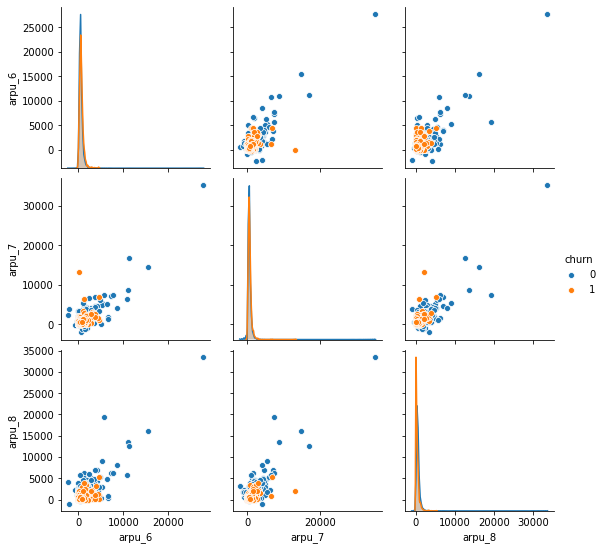

In [382]:
plotPairplot('arpu' , teledata)

Remove all the columns from which the average was derived

In [383]:
remove_columns = ['arpu_6','arpu_7' , 'onnet_mou_6' , 'onnet_mou_7' , 'offnet_mou_6' , 'offnet_mou_7' , 'roam_ic_mou_6' , 'roam_ic_mou_7' , 'roam_og_mou_6' , 'roam_og_mou_7' , 'loc_og_mou_6' , 'loc_og_mou_7' , 'std_og_mou_6' , 'std_og_mou_7' , 'isd_og_mou_6' , 'isd_og_mou_7' , 'spl_og_mou_6' , 'spl_og_mou_7' , 'loc_ic_mou_6' , 'loc_ic_mou_7' , 'std_ic_mou_6' , 'std_ic_mou_7' , 'isd_ic_mou_6' , 'isd_ic_mou_7' , 'spl_ic_mou_6' , 'spl_ic_mou_7' , 'total_rech_num_6' , 'total_rech_num_7' , 'vol_2g_mb_6' , 'vol_2g_mb_7' , 'max_rech_amt_6' , 'max_rech_amt_7']

In [384]:
teledata.drop(remove_columns , axis=1 , inplace=True)

In [385]:
teledata.shape

(28504, 88)

# Modelling

In [386]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score
# from sklearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [387]:
teledata.dtypes

mobile_number               int64
arpu_8                    float64
onnet_mou_8               float64
offnet_mou_8              float64
roam_ic_mou_8             float64
roam_og_mou_8             float64
loc_og_t2c_mou_6          float64
loc_og_t2c_mou_7          float64
loc_og_t2c_mou_8          float64
loc_og_mou_8              float64
std_og_t2f_mou_6          float64
std_og_t2f_mou_7          float64
std_og_t2f_mou_8          float64
std_og_mou_8              float64
isd_og_mou_8              float64
spl_og_mou_8              float64
og_others_6               float64
og_others_7               float64
og_others_8               float64
loc_ic_mou_8              float64
std_ic_t2t_mou_6          float64
std_ic_t2t_mou_7          float64
std_ic_t2t_mou_8          float64
std_ic_t2f_mou_6          float64
std_ic_t2f_mou_7          float64
std_ic_t2f_mou_8          float64
std_ic_mou_8              float64
spl_ic_mou_8              float64
isd_ic_mou_8              float64
ic_others_6   

## Train Test Split

In [388]:
# divide data into train and test
X = teledata.drop(["churn" , "mobile_number"], axis = 1)
y = teledata.churn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [389]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y, train_size=0.8,test_size=0.2,random_state=111)

In [390]:
X_train[:5,:5]

array([[-0.52240496,  0.11131563, -0.45691498, -0.17217253, -0.19370497],
       [ 0.72685482,  0.53953553, -0.15453054, -0.17217253, -0.19370497],
       [ 1.7556053 ,  4.68721271, -0.21119802, -0.17217253, -0.19370497],
       [ 0.73457531, -0.43487487,  1.272411  , -0.17217253, -0.19370497],
       [-0.50889709, -0.46403348, -0.53083804, -0.17217253, -0.19370497]])

In [391]:
X_test[:5,:5]

array([[ 0.44557411,  0.51557073,  1.27255514, -0.17217253, -0.19370497],
       [-1.05055167, -0.52741519, -0.72116417, -0.17217253, -0.19370497],
       [ 0.49275578,  1.48192102, -0.26004078, -0.17217253, -0.19370497],
       [-0.007842  , -0.43929284, -0.6620875 , -0.17217253, -0.19370497],
       [ 0.61660317, -0.32916684, -0.1314476 , -0.17217253, -0.19370497]])

## PCA

In [392]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [393]:
pca = PCA(random_state=42)

In [394]:
pca.fit(X_tr)

PCA(random_state=42)

In [395]:
pca.components_

array([[ 0.18367566,  0.0808187 ,  0.11449513, ...,  0.10449763,
         0.10110437,  0.01628167],
       [ 0.13522806,  0.06328421,  0.08592225, ...,  0.17045128,
        -0.00133851,  0.04229407],
       [ 0.12848788,  0.11974497,  0.13016424, ...,  0.02900493,
         0.05673228,  0.04777332],
       ...,
       [-0.        , -0.08424526, -0.03730965, ...,  0.09200551,
         0.07958423,  0.09622847],
       [ 0.        , -0.13704128, -0.23749006, ..., -0.26216206,
        -0.22676865, -0.08804569],
       [ 0.        , -0.1713525 ,  0.02901806, ...,  0.07315767,
         0.06328096, -0.02667303]])

In [396]:
pca.explained_variance_ratio_

array([9.34218039e-02, 7.65049684e-02, 5.91051435e-02, 5.45450003e-02,
       4.81619625e-02, 4.71993505e-02, 3.47488686e-02, 3.20706563e-02,
       2.82749819e-02, 2.74839896e-02, 2.54906107e-02, 2.29478373e-02,
       2.21589123e-02, 2.08296281e-02, 2.00035838e-02, 1.93441600e-02,
       1.85266908e-02, 1.79931227e-02, 1.69548009e-02, 1.60836029e-02,
       1.56797388e-02, 1.55416934e-02, 1.48520724e-02, 1.33399908e-02,
       1.23878847e-02, 1.21621566e-02, 1.19085364e-02, 1.12002199e-02,
       1.08943087e-02, 1.03416868e-02, 9.95064587e-03, 9.09740815e-03,
       8.78574413e-03, 8.37148185e-03, 8.04958500e-03, 7.72103479e-03,
       7.33612635e-03, 6.96553722e-03, 6.58392667e-03, 6.44108507e-03,
       5.92086554e-03, 5.74843851e-03, 5.21126399e-03, 5.03682106e-03,
       4.87089728e-03, 4.63167720e-03, 4.36773723e-03, 4.00959604e-03,
       3.87472515e-03, 3.56503602e-03, 3.44713449e-03, 3.41096445e-03,
       3.35937207e-03, 3.27179788e-03, 3.05192300e-03, 2.76165459e-03,
      

In [397]:
pcadf=pd.DataFrame({'Feature':list(X.columns),'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2]})
pcadf.head()

,Feature,PC1,PC2,PC3
0,arpu_8,0.183676,0.135228,0.128488
1,onnet_mou_8,0.080819,0.063284,0.119745
2,offnet_mou_8,0.114495,0.085922,0.130164
3,roam_ic_mou_8,0.040084,0.399823,-0.200170
4,roam_og_mou_8,0.059903,0.377405,-0.080122


In [398]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       9.34
1      16.99
2      22.90
3      28.36
4      33.17
5      37.89
6      41.37
7      44.58
8      47.40
9      50.15
10     52.70
11     55.00
12     57.21
13     59.29
14     61.29
15     63.23
16     65.08
17     66.88
18     68.58
19     70.18
20     71.75
21     73.31
22     74.79
23     76.13
24     77.37
25     78.58
26     79.77
27     80.89
28     81.98
29     83.02
30     84.01
31     84.92
32     85.80
33     86.64
34     87.44
35     88.21
36     88.95
37     89.64
38     90.30
39     90.95
40     91.54
41     92.11
42     92.63
43     93.14
44     93.62
45     94.09
46     94.52
47     94.93
48     95.31
49     95.67
50     96.01
51     96.36
52     96.69
53     97.02
54     97.32
55     97.60
56     97.86
57     98.12
58     98.36
59     98.58
60     98.81
61     99.03
62     99.23
63     99.42
64     99.60
65     99.76
66     99.91
67    100.00
68    100.00
69    100.00
70    100.00
71    100.00
72    100.00
73    100.00
74    100.00
75    100.00
76    100.00

38 components explain the 90% variance and 47 components explain the 95% variance

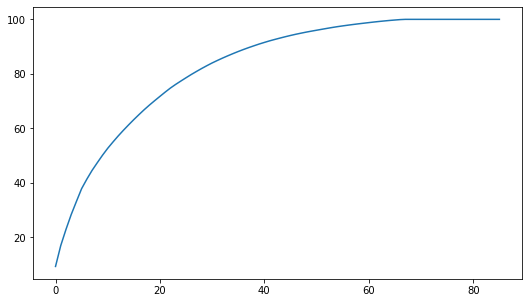

In [399]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [400]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(43038, 86)
(5701, 86)


In [401]:
pcadf=pd.DataFrame({'Feature':list(X.columns),'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2]})
pcadf.head()

,Feature,PC1,PC2,PC3
0,arpu_8,0.183676,0.135228,0.128488
1,onnet_mou_8,0.080819,0.063284,0.119745
2,offnet_mou_8,0.114495,0.085922,0.130164
3,roam_ic_mou_8,0.040084,0.399823,-0.200170
4,roam_og_mou_8,0.059903,0.377405,-0.080122


# Logistic Regression

In [402]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [403]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

[[4219 1170]
 [  59  253]]
Accuracy of the logistic regression model with PCA:  0.7844237853008245


In [404]:
pca_column_frame = pcadf.head(44)
pca_column_frame

,Feature,PC1,PC2,PC3
0,arpu_8,0.183676,0.135228,0.128488
1,onnet_mou_8,0.080819,0.063284,0.119745
2,offnet_mou_8,0.114495,0.085922,0.130164
3,roam_ic_mou_8,0.040084,0.399823,-0.200170
4,roam_og_mou_8,0.059903,0.377405,-0.080122
5,loc_og_t2c_mou_6,-0.010117,0.001484,0.065496
6,loc_og_t2c_mou_7,-0.007956,0.009552,0.091251
7,loc_og_t2c_mou_8,0.031205,0.001245,0.064162
8,loc_og_mou_8,0.114477,0.014734,0.097950
9,std_og_t2f_mou_6,0.024821,0.037385,0.082724


In [405]:
pca_column_frame['sampling_coeff'] = lr_pca1.coef_[0]
plt.figure(figsize=(20, 10))
top_10_features = pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].head(10)
top_10_features

,Feature,PC1,PC2,PC3,sampling_coeff
0,arpu_8,0.183676,0.135228,0.128488,0.503425
39,monthly_2g_8,0.061082,-0.029591,-0.006445,0.500247
3,roam_ic_mou_8,0.040084,0.399823,-0.200170,0.481066
20,std_ic_t2t_mou_7,0.000697,0.037403,0.050412,-0.444228
16,og_others_7,0.006235,0.152549,0.512281,0.381086
15,og_others_6,-0.025029,-0.003701,0.025741,0.342345
40,sachet_2g_6,0.009188,-0.106482,-0.047657,-0.316788
27,isd_ic_mou_8,0.027435,0.003196,0.021013,-0.305073
12,std_og_mou_8,0.070451,0.040287,0.143635,0.297954
41,sachet_2g_7,0.016333,-0.109400,-0.043019,-0.285346


<Figure size 1440x720 with 0 Axes>

###### Peforming PCA with 44 components 

In [406]:
pca_44 = PCA(n_components=39)

In [407]:
df_tr_pca_44 = pca_44.fit_transform(X_tr)

In [408]:
df_test_pca_44 = pca_44.transform(X_test)

###### FInding Logistic regression again with 44 components 

In [409]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_44, y_tr)

# Predicted probabilities
y_pred44 = lr_pca1.predict(df_test_pca_44)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred44)
# print("Accuracy with 44 PCAs: ",accuracy_score(y_train,y_pred44))
print("Accuracy with 44 PCAs: ",accuracy_score(y_test,y_pred44))

Accuracy with 44 PCAs:  0.7828451148921242


In [410]:
print(confusion_matrix(y_test,y_pred44))

[[4219 1170]
 [  68  244]]


In [411]:
print(classification_report(y_test,y_pred44))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      5389
           1       0.17      0.78      0.28       312

    accuracy                           0.78      5701
   macro avg       0.58      0.78      0.58      5701
weighted avg       0.94      0.78      0.84      5701



In [412]:
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred44))

'0.78'

In [413]:
pca_column_frame = pcadf.head(39)
pca_column_frame

,Feature,PC1,PC2,PC3
0,arpu_8,0.183676,0.135228,0.128488
1,onnet_mou_8,0.080819,0.063284,0.119745
2,offnet_mou_8,0.114495,0.085922,0.130164
3,roam_ic_mou_8,0.040084,0.399823,-0.200170
4,roam_og_mou_8,0.059903,0.377405,-0.080122
5,loc_og_t2c_mou_6,-0.010117,0.001484,0.065496
6,loc_og_t2c_mou_7,-0.007956,0.009552,0.091251
7,loc_og_t2c_mou_8,0.031205,0.001245,0.064162
8,loc_og_mou_8,0.114477,0.014734,0.097950
9,std_og_t2f_mou_6,0.024821,0.037385,0.082724


In [414]:
lr_pca1.coef_[0]

array([-0.63251807,  0.23237841, -0.24157309,  0.20438011,  0.08210208,
        0.21301008, -0.17339998,  0.00571135,  0.26598442,  0.03321119,
       -0.32823497, -0.26984134,  0.12882387, -0.4329497 , -0.04732109,
        0.1828252 ,  0.18851146,  0.47449354,  0.01858125,  0.19950966,
       -0.27438669, -0.07489534, -0.20411149,  0.17099902, -0.12369358,
       -0.13191846, -0.01415026, -0.29802772, -0.00903344,  0.04438069,
       -0.04348532, -0.15200744, -0.03274937, -0.29500532, -0.11256181,
       -0.25792095,  0.51633541,  0.14773515, -0.05987295])

In [415]:
pca_column_frame['sampling_coeff'] = lr_pca1.coef_[0]
plt.figure(figsize=(20, 10))
top_10_features = pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].head(10)
top_10_features

,Feature,PC1,PC2,PC3,sampling_coeff
0,arpu_8,0.183676,0.135228,0.128488,-0.632518
36,vol_2g_mb_8,0.050689,-0.043251,-0.012311,0.516335
17,og_others_8,0.005193,0.116716,0.393754,0.474494
13,isd_og_mou_8,0.014074,0.012846,0.015064,-0.432950
10,std_og_t2f_mou_7,0.027248,0.053886,0.116840,-0.328235
27,isd_ic_mou_8,0.027435,0.003196,0.021013,-0.298028
33,last_day_rch_amt_6,0.066376,0.150263,0.028238,-0.295005
20,std_ic_t2t_mou_7,0.000697,0.037403,0.050412,-0.274387
11,std_og_t2f_mou_8,0.033622,0.027409,0.051334,-0.269841
8,loc_og_mou_8,0.114477,0.014734,0.097950,0.265984


<Figure size 1440x720 with 0 Axes>

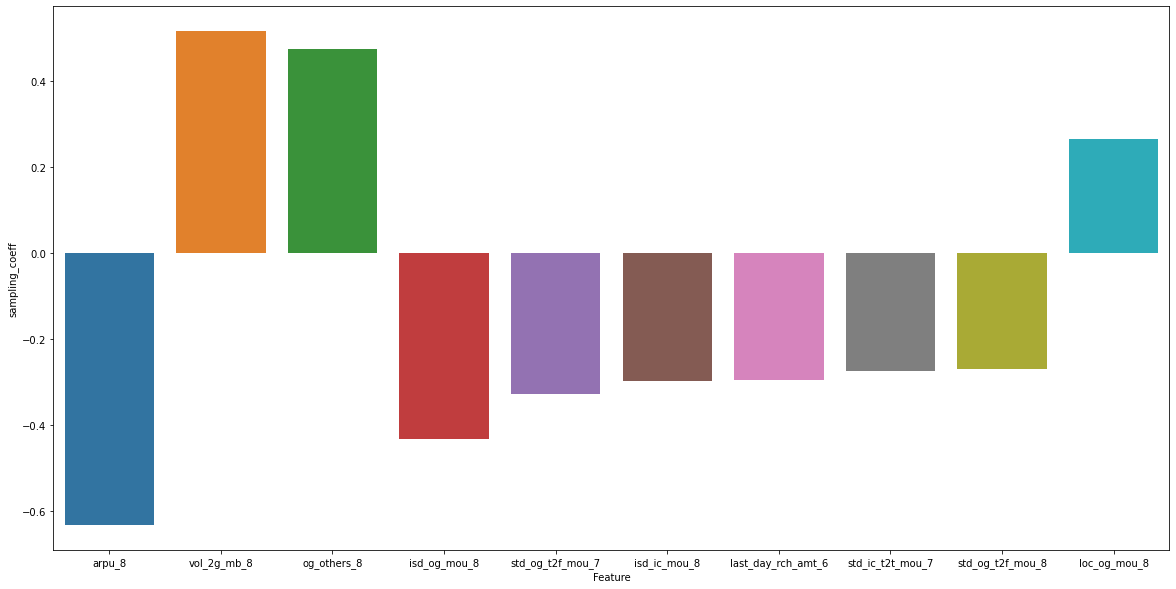

In [416]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Feature' , y ='sampling_coeff', data=top_10_features)

## Decision Tree

In [417]:
from sklearn.tree import DecisionTreeClassifier

In [418]:
df_dtree = teledata.copy(deep=True)
df_dtree.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Avg_arpu_6_7,Avg_onnet_6_7,Avg_offnet_mou_6_7,Avg_roam_ic_mou_6_7,Avg_roam_og_mou_6_7,Avg_loc_og_mou_6_7,Avg_std_og_mou_6_7,Avg_isd_og_mou_6_7,Avg_spl_og_mou_6_7,Avg_loc_ic_mou_6_7,Avg_std_ic_mou_6_7,Avg_isd_ic_mou_6_7,Avg_spl_ic_mou_6_7,Avg_total_rech_num_6_7,Avg_vol_2g_mb_6_7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_rech_num_diff,Avg_max_rech_amt_6_7,max_rech_amt_diff,vol_2g_mb_diff
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.0,0.0,0.00,255.79,6.66,20.08,16.68,77.84,10.01,6.50,0.0,0.0,0.0,188.04,36.89,11.83,30.39,52.19,34.24,22.21,193.94,0.0,31.59,15.74,15.19,15.14,7,1580,0,0,779,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,478.035,68.000,0.090,2.25,391.555,176.810,8.295,0.105,5.0,0.000,1961.9650,-3.97,-184.385,6.78,19.895,-222.245,9.840,9.920,4.25,-203.515,17.130,23.295,-0.105,2.0,1185.0,395.0,0.000
8,7001524846,137.362,35.08,136.48,0.00,0.00,0.0,0.0,7.15,63.04,0.00,0.00,0.00,98.28,0.00,10.23,0.0,0.0,0.0,15.79,0.00,0.58,0.10,0.00,0.00,0.00,0.75,0.0,0.00,0.00,0.00,0.00,14,30,50,0,10,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,435.4720,382.36,87.645,0.00,0.000,333.135,136.870,0.000,0.00,52.630,13.545,0.000,0.000,20.0,178.000,-298.1100,-347.28,48.835,0.00,0.000,-270.095,-38.590,0.000,10.23,-36.840,-12.795,0.000,0.000,-6.0,122.0,-92.0,-177.970
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.0,0.0,0.00,129.74,0.00,0.00,0.00,938.79,0.00,0.00,0.0,0.0,0.0,159.11,14.06,5.98,0.18,0.00,0.00,0.00,101.93,0.0,0.00,0.00,0.00,0.00,27,50,30,20,50,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,95.565,848.990,0.000,0.00,106.505,62.985,0.000,0.000,24.0,0.000,81.6570,-32.12,156.085,0.00,0.000,34.175,89.800,0.000,0.00,52.605,38.945,0.000,0.000,3.0,50.0,0.0,0.000
23,7000887461,366.966,33.58,205.89,0.00,0.00,0.0,0.0,17.71,182.14,0.00,0.00,0.00,39.61,0.00,17.71,0.0,0.0,0.0,224.21,0.51,0.00,13.38,0.00,0.00,0.00,57.29,0.0,3.74,0.00,5.35,13.06,4,179,0,179,0,0.01,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.0,0,134.1235,49.81,87.385,0.00,0.000,132.795,4.355,0.005,0.05,145.520,8.915,14.115,0.000,4.0,0.240,232.8425,-16.23,118.505,0.00,0.000,49.345,35.255,-0.005,17.66,78.690,48.375,-10.375,0.000,0.0,89.5,89.5,-0.230
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.0,0.0,40.54,0.00,2.91,0.05,0.23,0.96,0.13,1.04,0.0,0.00,1.23,0.65,0.20,1,455,252,0,455,7.97,0,0,0,0,0,0,4,5,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0,1669.9265,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,2.180,4.420,0.000,0.000,10.5,72.405,-1260.6965,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.56,38.360,-3.380,0.000,0.000,-9.5,753.5,-298.5,-64.435


In [419]:
df_dtree.drop('mobile_number', axis=1, inplace=True)

In [420]:
X=df_dtree.drop('churn', axis=1)
y=df_dtree['churn']

In [421]:
scaler_dtree=StandardScaler().fit(X)
X_dt_scaled = scaler.transform(X)

In [422]:
X_train,X_test,y_train,y_test = train_test_split(X_dt_scaled,y,train_size=0.7,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19952, 86)
(8552, 86)
(19952,)
(8552,)


In [423]:
#Fixing imbalance via SMOTE
from imblearn.over_sampling import SMOTE
s = SMOTE(random_state=100)
X_bal,y_bal=s.fit_sample(X_train,y_train)

In [424]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [425]:
lasso = LinearSVC(penalty='l1',dual=False,C=0.001).fit(X_bal,y_bal)
model = SelectFromModel(lasso,prefit=True)
X_lasso = model.transform(X_bal)

In [426]:
print(X_lasso.shape)
model.get_support(True)

(37668, 34)


array([ 2,  3,  4,  5,  8, 11, 14, 15, 18, 21, 25, 26, 31, 35, 36, 37, 38,
       39, 42, 45, 49, 53, 57, 58, 69, 70, 74, 75, 78, 79, 80, 82, 83, 85],
      dtype=int64)

In [427]:
lasso_cols = df_dtree.drop('churn',axis=1).columns[model.get_support(True)]
display(lasso_cols)

Index(['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'og_others_6',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon',
       'sep_vbc_3g', 'Avg_roam_ic_mou_6_7', 'Avg_roam_og_mou_6_7', 'arpu_diff',
       'onnet_mou_diff', 'loc_og_mou_diff', 'std_og_mou_diff',
       'loc_ic_mou_diff', 'std_ic_mou_diff', 'isd_ic_mou_diff',
       'total_rech_num_diff', 'Avg_max_rech_amt_6_7', 'vol_2g_mb_diff'],
      dtype='object')

In [428]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_lasso,y_bal)

DecisionTreeClassifier(max_depth=5)

In [433]:
X_test_dtree = pd.DataFrame(X_test).iloc[:,model.get_support(True)]

In [434]:
y_pred_dtree = dtree.predict(X_test_dtree)

In [435]:
print(confusion_matrix(y_test,y_pred_dtree))
print(accuracy_score(y_test,y_pred_dtree))
print(classification_report(y_test,y_pred_dtree))

[[6724 1350]
 [ 108  370]]
0.8295135640785781
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8074
           1       0.22      0.77      0.34       478

    accuracy                           0.83      8552
   macro avg       0.60      0.80      0.62      8552
weighted avg       0.94      0.83      0.87      8552



Lets fine tune the model hyperparametes

In [436]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

nfolds=5
parameters = {'max_depth':range(1,40)}
d_maxdepth = DecisionTreeClassifier(random_state=100)
mod_maxdepth = GridSearchCV(d_maxdepth, param_grid=parameters, n_jobs=-1,cv=nfolds, scoring="accuracy",return_train_score=True)
mod_maxdepth.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy')

In [437]:
mod_maxdepth.best_params_

{'max_depth': 20}

In [438]:
nfolds=5
params={'min_samples_leaf': range(5,300,20)}
dtree_minsampleaf = DecisionTreeClassifier(random_state=100)
mod_minsamplesleaf = GridSearchCV(dtree_minsampleaf,cv=nfolds,param_grid=params,return_train_score=True,n_jobs=-1,scoring='accuracy')
mod_minsamplesleaf.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 300, 20)},
             return_train_score=True, scoring='accuracy')

In [439]:
mod_minsamplesleaf.best_params_

{'min_samples_leaf': 5}

In [440]:
params={'min_samples_split': range(5,300,20)}
nfolds=5
dtree_splitmin = DecisionTreeClassifier(random_state=100)
mod_splitsamples = GridSearchCV(dtree_splitmin, cv=nfolds, n_jobs=-1, return_train_score=True,scoring="accuracy",param_grid=params)
mod_splitsamples.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 300, 20)},
             return_train_score=True, scoring='accuracy')

In [441]:
mod_splitsamples.best_params_

{'min_samples_split': 5}

Find the optimal hyperparameters for the entire tree at once

In [442]:
from sklearn.model_selection import GridSearchCV

In [444]:
nfolds=5
params_grid = {'max_depth':range(5,20,5),
              'min_samples_leaf': range(5,20,5),
              'min_samples_split': range(5,20,5),
              'criterion':['gini','entropy']}
dtree_grid = DecisionTreeClassifier()
grid_model = GridSearchCV(dtree_grid,cv=nfolds,param_grid=params_grid, n_jobs=-1)
grid_model.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(5, 20, 5),
                         'min_samples_split': range(5, 20, 5)})

In [445]:
print(grid_model.best_estimator_)
print(grid_model.best_params_)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=5)
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [446]:
dtree_optimal = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
dtree_optimal.fit(X_lasso,y_bal)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=5)

In [447]:
y_pred = dtree_optimal.predict(X_test_dtree)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8838868101028999
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8074
           1       0.28      0.66      0.39       478

    accuracy                           0.88      8552
   macro avg       0.63      0.78      0.66      8552
weighted avg       0.94      0.88      0.91      8552

[[7244  830]
 [ 163  315]]


,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_mou_8,std_og_t2f_mou_8,spl_og_mou_8,og_others_6,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_8,aon,sep_vbc_3g,Avg_roam_ic_mou_6_7,Avg_roam_og_mou_6_7,arpu_diff,onnet_mou_diff,loc_og_mou_diff,std_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,total_rech_num_diff,Avg_max_rech_amt_6_7,vol_2g_mb_diff
0,2.114599,-0.109287,-0.076559,-0.252646,0.632869,0.036012,-0.059141,-0.159812,-0.223014,1.394097,1.090752,-0.244531,-0.035160,0.388649,-0.343521,-0.406600,-0.413481,-0.385289,-0.425133,-0.336358,-0.884761,-0.156252,-0.038742,-0.161139,1.405879,0.712593,0.969291,1.762177,0.109197,0.926044,2.621623,0.474942,-0.260178,0.071125
1,-0.311231,0.539119,0.057482,-0.252646,-0.223192,0.146784,1.072536,-0.159812,-0.198732,-0.083064,-0.171104,-0.244531,-1.001507,1.099291,-0.247954,-0.406600,-0.413481,-0.385289,-0.425133,1.286999,1.912476,-0.156252,0.563167,0.195578,0.545490,-0.012279,0.042850,0.145083,-0.061251,-0.083467,-0.010305,-0.433576,1.524234,-0.093796
2,-0.719805,-0.172173,-0.193705,0.571075,-0.668847,-0.148014,-0.329875,-0.159812,-0.750655,-0.199899,-0.327671,-0.244531,-0.786763,-0.656413,-0.343521,1.884313,-0.413481,-0.385289,-0.425133,-0.336358,-0.695996,-0.156252,-0.220054,-0.251300,-0.565650,0.081364,0.047964,0.098654,0.024737,0.027231,0.001029,0.247813,0.220494,-0.280698
3,-0.721164,-0.172173,-0.193705,-0.252646,-0.670637,-0.148014,-0.315397,-0.159812,-0.736944,-0.199899,-0.327671,-0.244531,-1.001507,-0.656413,-0.343521,1.884313,3.993273,-0.385289,-0.425133,-0.336358,-0.998849,-0.156252,-0.220054,-0.251300,-0.548221,0.084773,0.074355,0.098654,-0.003047,0.027231,0.001029,-0.055027,0.042711,-5.756336
4,-0.182926,-0.172173,-0.193705,1.432596,0.634143,-0.148014,-0.329875,-0.159812,0.278903,0.134368,-0.115010,-0.244531,-0.357276,1.085357,-0.343521,1.884313,-0.413481,-0.385289,-0.425133,-0.336358,1.943591,-0.156252,-0.220054,-0.251300,-0.195635,-0.058526,-0.511743,0.075623,-0.036950,0.129596,0.001029,0.550652,1.188422,-0.214562


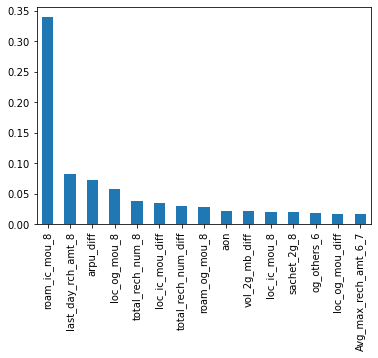

In [448]:
F = X_lasso
F = pd.DataFrame(X_lasso)
F.columns = lasso_cols
display(F.head())

#weights = pd.Series(dtree_optimal.feature_importances_)

weights = pd.Series(dtree_optimal.feature_importances_,index=F.columns.values)
weights.sort_values(ascending=False)[:15].plot(kind='bar')

## Random Forest

In [449]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_lasso,y_bal)

RandomForestClassifier()

In [450]:
y_pred = rf.predict(X_test_dtree)

In [451]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9396632366697848
[[7761  313]
 [ 203  275]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8074
           1       0.47      0.58      0.52       478

    accuracy                           0.94      8552
   macro avg       0.72      0.77      0.74      8552
weighted avg       0.95      0.94      0.94      8552



Lets find the optimal parameters for the random forest

In [452]:
#MAX DEPTH
params = {'max_depth':range(2,20,5)}
rf_md = RandomForestClassifier()
max_depth_rfmodel = GridSearchCV(rf_md,cv=n_folds,scoring="accuracy",param_grid=params,n_jobs=-1,return_train_score=True)
max_depth_rfmodel.fit(X_lasso,y_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [453]:
max_depth_rfmodel.best_params_

{'max_depth': 17}

In [454]:
n_folds=5
params_grid={
    'max_depth': range(2,20,5),
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

rf_grid = RandomForestClassifier()
grid_rf_model = GridSearchCV(rf_grid,cv=n_folds,param_grid=params_grid,scoring="accuracy",n_jobs=-1, verbose=1)
grid_rf_model.fit(X_lasso,y_bal)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 31.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5), 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [455]:
print(grid_rf_model.best_params_)

{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [456]:
rf_opt = RandomForestClassifier(max_depth=17,max_features=10,min_samples_leaf=100,min_samples_split=200,n_estimators=200)
rf_opt.fit(X_lasso,y_bal)

RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

In [457]:
y_pred = rf_opt.predict(X_test_dtree)

In [458]:

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8873947614593077
[[7220  854]
 [ 109  369]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      8074
           1       0.30      0.77      0.43       478

    accuracy                           0.89      8552
   macro avg       0.64      0.83      0.69      8552
weighted avg       0.95      0.89      0.91      8552



In [459]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.8330974573065255


,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_mou_8,std_og_t2f_mou_8,spl_og_mou_8,og_others_6,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_8,aon,sep_vbc_3g,Avg_roam_ic_mou_6_7,Avg_roam_og_mou_6_7,arpu_diff,onnet_mou_diff,loc_og_mou_diff,std_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,total_rech_num_diff,Avg_max_rech_amt_6_7,vol_2g_mb_diff
0,2.114599,-0.109287,-0.076559,-0.252646,0.632869,0.036012,-0.059141,-0.159812,-0.223014,1.394097,1.090752,-0.244531,-0.035160,0.388649,-0.343521,-0.406600,-0.413481,-0.385289,-0.425133,-0.336358,-0.884761,-0.156252,-0.038742,-0.161139,1.405879,0.712593,0.969291,1.762177,0.109197,0.926044,2.621623,0.474942,-0.260178,0.071125
1,-0.311231,0.539119,0.057482,-0.252646,-0.223192,0.146784,1.072536,-0.159812,-0.198732,-0.083064,-0.171104,-0.244531,-1.001507,1.099291,-0.247954,-0.406600,-0.413481,-0.385289,-0.425133,1.286999,1.912476,-0.156252,0.563167,0.195578,0.545490,-0.012279,0.042850,0.145083,-0.061251,-0.083467,-0.010305,-0.433576,1.524234,-0.093796
2,-0.719805,-0.172173,-0.193705,0.571075,-0.668847,-0.148014,-0.329875,-0.159812,-0.750655,-0.199899,-0.327671,-0.244531,-0.786763,-0.656413,-0.343521,1.884313,-0.413481,-0.385289,-0.425133,-0.336358,-0.695996,-0.156252,-0.220054,-0.251300,-0.565650,0.081364,0.047964,0.098654,0.024737,0.027231,0.001029,0.247813,0.220494,-0.280698
3,-0.721164,-0.172173,-0.193705,-0.252646,-0.670637,-0.148014,-0.315397,-0.159812,-0.736944,-0.199899,-0.327671,-0.244531,-1.001507,-0.656413,-0.343521,1.884313,3.993273,-0.385289,-0.425133,-0.336358,-0.998849,-0.156252,-0.220054,-0.251300,-0.548221,0.084773,0.074355,0.098654,-0.003047,0.027231,0.001029,-0.055027,0.042711,-5.756336
4,-0.182926,-0.172173,-0.193705,1.432596,0.634143,-0.148014,-0.329875,-0.159812,0.278903,0.134368,-0.115010,-0.244531,-0.357276,1.085357,-0.343521,1.884313,-0.413481,-0.385289,-0.425133,-0.336358,1.943591,-0.156252,-0.220054,-0.251300,-0.195635,-0.058526,-0.511743,0.075623,-0.036950,0.129596,0.001029,0.550652,1.188422,-0.214562


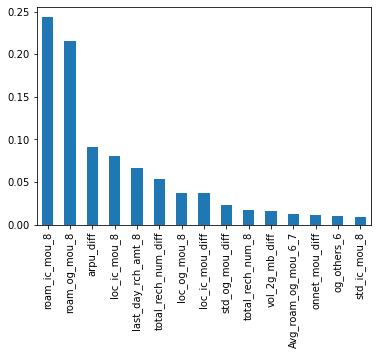

In [460]:
X = X_lasso
X = pd.DataFrame(X_lasso)
X.columns = lasso_cols
display(X.head())
importances = rf_opt.feature_importances_
importances.shape
#print(importances)
weights = pd.Series(importances,index=X.columns.values)
# print(weights.sort_values()[-10:])
# weights.sort_values()[-10:].plot(kind = 'barh')
weights.sort_values(ascending=False)[:15].plot(kind = 'bar')

## Trying Decision forest with PCA 

In [461]:
X_train,X_test,y_train,y_test = train_test_split(X_dt_scaled,y,train_size=0.7,random_state=100)

In [462]:
smo = SMOTE()
X_tr,y_tr = smo.fit_sample(X_train,y_train)

In [463]:
pcafinal = PCA(random_state=100 ,n_components=44 )

In [464]:
Xfinal_pca = pcafinal.fit_transform(X_tr)
Xtestfinal_pca = pcafinal.transform(X_test)

Decision Treee

In [465]:
dtree_pca = DecisionTreeClassifier(max_depth=5)
dtree_pca.fit(Xfinal_pca,y_tr)

DecisionTreeClassifier(max_depth=5)

In [466]:
dtree_y_predfinal_pca = dtree_pca.predict(Xtestfinal_pca)

In [467]:
print(classification_report(y_test,dtree_y_predfinal_pca))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8074
           1       0.18      0.74      0.29       478

    accuracy                           0.80      8552
   macro avg       0.58      0.77      0.59      8552
weighted avg       0.94      0.80      0.85      8552



In [468]:
nfolds=5
params_grid = {'max_depth':range(5,20,5),
              'min_samples_leaf': range(25,200,50),
              'min_samples_split': range(25,200,50),
              'criterion':['gini','entropy']}
dtree_grid_pca = DecisionTreeClassifier()
grid_model_pca = GridSearchCV(dtree_grid_pca,cv=nfolds,param_grid=params_grid, n_jobs=-1)
grid_model_pca.fit(Xfinal_pca,y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(25, 200, 50),
                         'min_samples_split': range(25, 200, 50)})

In [268]:
grid_model_pca.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 25,
 'min_samples_split': 25}

In [469]:
d_tree_optimal = DecisionTreeClassifier(max_depth=15 , min_samples_leaf=25 , min_samples_split=25 , criterion='entropy' )
d_tree_optimal.fit(Xfinal_pca , y_tr)
y_pred_dt_optimal = d_tree_optimal.predict(Xtestfinal_pca)

In [470]:
print(classification_report(y_test , y_pred_dt_optimal))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8074
           1       0.18      0.59      0.27       478

    accuracy                           0.82      8552
   macro avg       0.57      0.72      0.59      8552
weighted avg       0.93      0.82      0.86      8552



In [471]:
pca_column_frame = pcadf.head(39)
pca_column_frame

,Feature,PC1,PC2,PC3
0,arpu_8,0.183676,0.135228,0.128488
1,onnet_mou_8,0.080819,0.063284,0.119745
2,offnet_mou_8,0.114495,0.085922,0.130164
3,roam_ic_mou_8,0.040084,0.399823,-0.200170
4,roam_og_mou_8,0.059903,0.377405,-0.080122
5,loc_og_t2c_mou_6,-0.010117,0.001484,0.065496
6,loc_og_t2c_mou_7,-0.007956,0.009552,0.091251
7,loc_og_t2c_mou_8,0.031205,0.001245,0.064162
8,loc_og_mou_8,0.114477,0.014734,0.097950
9,std_og_t2f_mou_6,0.024821,0.037385,0.082724


In [472]:
importances = d_tree_optimal.feature_importances_
X = pca_column_frame['Feature']
col_names =  X

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,value,colName
0,0.408666,arpu_8
1,0.077390,roam_og_mou_8
2,0.047436,spl_og_mou_8
3,0.022192,roam_ic_mou_8
4,0.020566,monthly_2g_7
5,0.020466,std_og_t2f_mou_6
6,0.018544,std_ic_t2t_mou_7
7,0.016413,std_ic_t2f_mou_6
8,0.016011,std_ic_t2t_mou_6
9,0.015978,og_others_7


## Trying Random Forest with PCA

In [473]:
X_train,X_test,y_train,y_test = train_test_split(X_dt_scaled,y,train_size=0.7,random_state=100)

In [474]:
smo = SMOTE()
X_tr,y_tr = smo.fit_sample(X_train,y_train)

In [475]:
pcafinal = PCA(random_state=100 ,n_components=44 )

In [476]:
Xfinal_pca = pcafinal.fit_transform(X_tr)
Xtestfinal_pca = pcafinal.transform(X_test)

In [477]:
n_folds=5
params_grid={
    'max_depth': range(2,20,5),
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

rf_grid_pca = RandomForestClassifier()
grid_rf_model_pca = GridSearchCV(rf_grid_pca,cv=n_folds,param_grid=params_grid,scoring="accuracy",n_jobs=-1, verbose=1)
grid_rf_model_pca.fit(Xfinal_pca,y_tr)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 49.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 58.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5), 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [478]:
grid_rf_model_pca.best_params_

{'max_depth': 17,
 'max_features': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 100}

In [479]:
rf_opt_pca=RandomForestClassifier(max_depth=17, max_features=5,min_samples_leaf=100, min_samples_split=200, n_estimators=100)
rf_opt_pca.fit(Xfinal_pca,y_tr)
y_pred_final_rf_opt = rf_opt_pca.predict(Xtestfinal_pca)

In [480]:
print(classification_report(y_test,y_pred_final_rf_opt))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8074
           1       0.23      0.71      0.34       478

    accuracy                           0.85      8552
   macro avg       0.60      0.78      0.63      8552
weighted avg       0.94      0.85      0.88      8552



In [481]:
pca_column_frame = pcadf.head(39)
pca_column_frame

,Feature,PC1,PC2,PC3
0,arpu_8,0.183676,0.135228,0.128488
1,onnet_mou_8,0.080819,0.063284,0.119745
2,offnet_mou_8,0.114495,0.085922,0.130164
3,roam_ic_mou_8,0.040084,0.399823,-0.200170
4,roam_og_mou_8,0.059903,0.377405,-0.080122
5,loc_og_t2c_mou_6,-0.010117,0.001484,0.065496
6,loc_og_t2c_mou_7,-0.007956,0.009552,0.091251
7,loc_og_t2c_mou_8,0.031205,0.001245,0.064162
8,loc_og_mou_8,0.114477,0.014734,0.097950
9,std_og_t2f_mou_6,0.024821,0.037385,0.082724


In [287]:
importances = d_tree_optimal.feature_importances_
X = pca_column_frame['Feature']
col_names =  X

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,value,colName
0,0.258682,arpu_6
1,0.156289,arpu_8
2,0.058294,onnet_mou_6
3,0.034686,roam_og_mou_8
4,0.023890,loc_og_mou_8
5,0.022659,roam_ic_mou_6
6,0.022415,og_others_8
7,0.019451,std_ic_t2f_mou_6
8,0.019268,arpu_7
9,0.019082,onnet_mou_7


### Result of Analysis 

i.Couple of key things to look out for are(in order of scores): The minutes of usage in the 8th month for both incoming and outgoing calls (including roaming,local,std) The number of recharges in the 8th month and the amount of recharge in the 8th month.

ii. A few strategies that the telecom company can adopt are: To focus on customers whose number of recharges are decreasing steadily from 6th to 8th months To focus on customers whose recharge amount decreases steadily in 6th and 7th month and steeply in 8th month

iii.From logistic regression we can see that AON(age on network) is also an important term to look at and also we can see from the graph of AON vs Churn rate that the chirn rate is high for the customers with less than 5 years and less for customers with more than 5 years